# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [4]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)
print(tabela.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

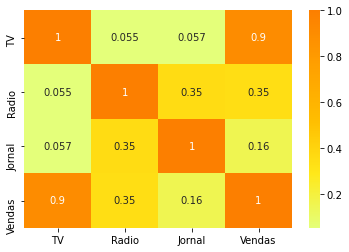

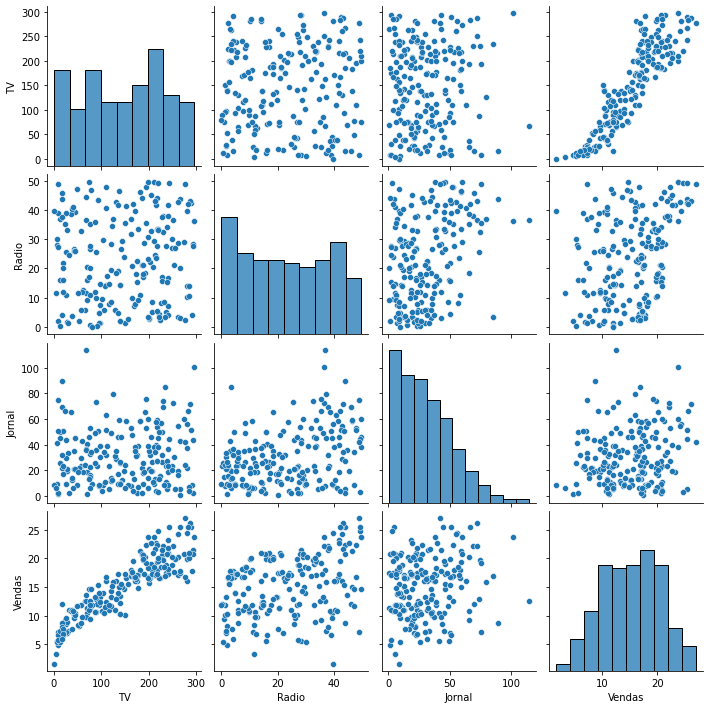

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tabela.corr(), annot=True, cmap="Wistia") #Cria um gráfico de calor que mostra a correlação
plt.show() #Mostra o gráfico

sns.pairplot(tabela) #Cria um gráfico pairplot
plt.show()

Analisando os gráficos, podemos notar a correlação entre Vendas e as características(TV, Rádio, Jornal). 
TV: 0.9, Rádio: 0.35, Jornal: 0.16.
Entre as características, não há correlação alta.

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [11]:
from sklearn.model_selection import train_test_split

#Separar x (TV, Rádio, Jornal) e y (Vendas):
y  = tabela["Vendas"]
x = tabela.drop("Vendas", axis=1)

#Separando em dados de treino e dados de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Cria as inteligencias artificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#Treina as inteligencia artificiais
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [14]:
from sklearn import metrics

#Criar as previsões
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

#Comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.9071151423684273
0.9648123307870028


#### Visualização Gráfica das Previsões

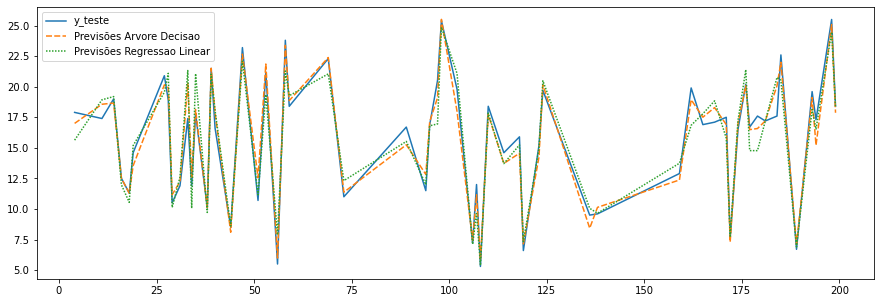

In [16]:
tabela_auxiliar = pd.DataFrame() #Cria uma tabela auxiliar vazia
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsões Arvore Decisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsões Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,5)) #Tamanho do gráfico
sns.lineplot(data=tabela_auxiliar) #Criar gráfico da tabela_auxiliar
plt.show()

#### Qual a importância de cada variável para as vendas?

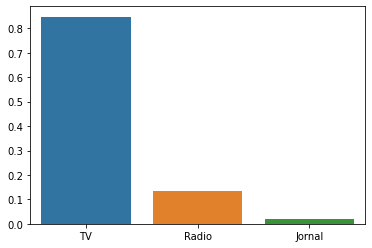

In [18]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

#### Será que estamos investindo certo?

A melhor decisão é investir mais em TV e menos em Jornal.
TV é o meio de comunicação que mais impacta nas vendas, cerca de 90%. Logo em seguida vem o Rádio com aproximadamente 10% e Jornal com menos de 10%.